In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [113]:
netflix_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BIA/My projects/Netflix TV shows & Movies/netflix_titles.csv")
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [114]:
netflix_df.shape

(8807, 12)

In [115]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [116]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [117]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [118]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

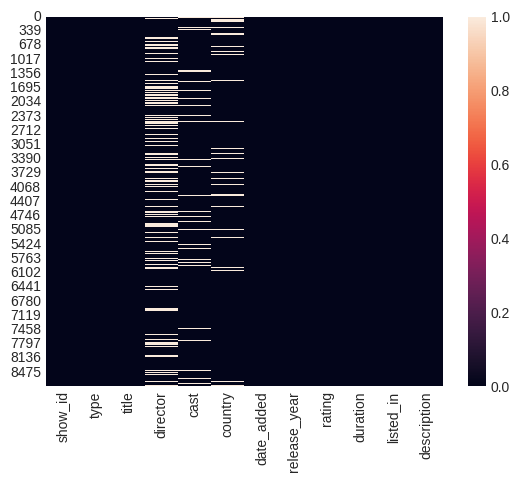

In [119]:
sns.heatmap(netflix_df.isnull())

In [120]:
netflix_df.duplicated().sum()

0

In [121]:
netflix_df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [122]:
netflix_df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [123]:
netflix_df["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [124]:
netflix_df["listed_in"].nunique()

514

In [125]:
netflix_df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

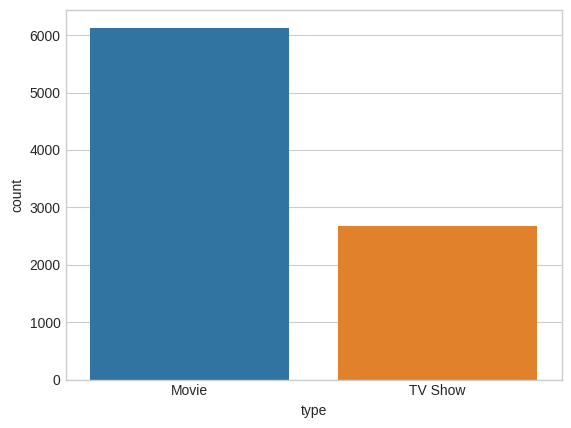

In [126]:
plt.style.use('seaborn-whitegrid')
sns.countplot(x=netflix_df["type"])

<Axes: ylabel='type'>

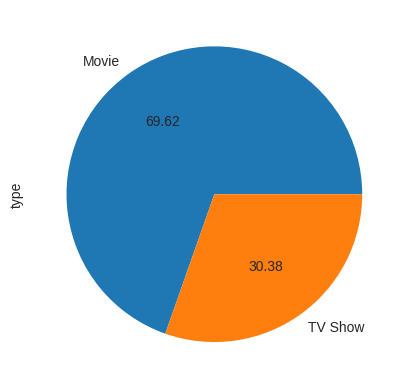

In [127]:
netflix_df["type"].value_counts().plot(kind = "pie", autopct = "%.2f")

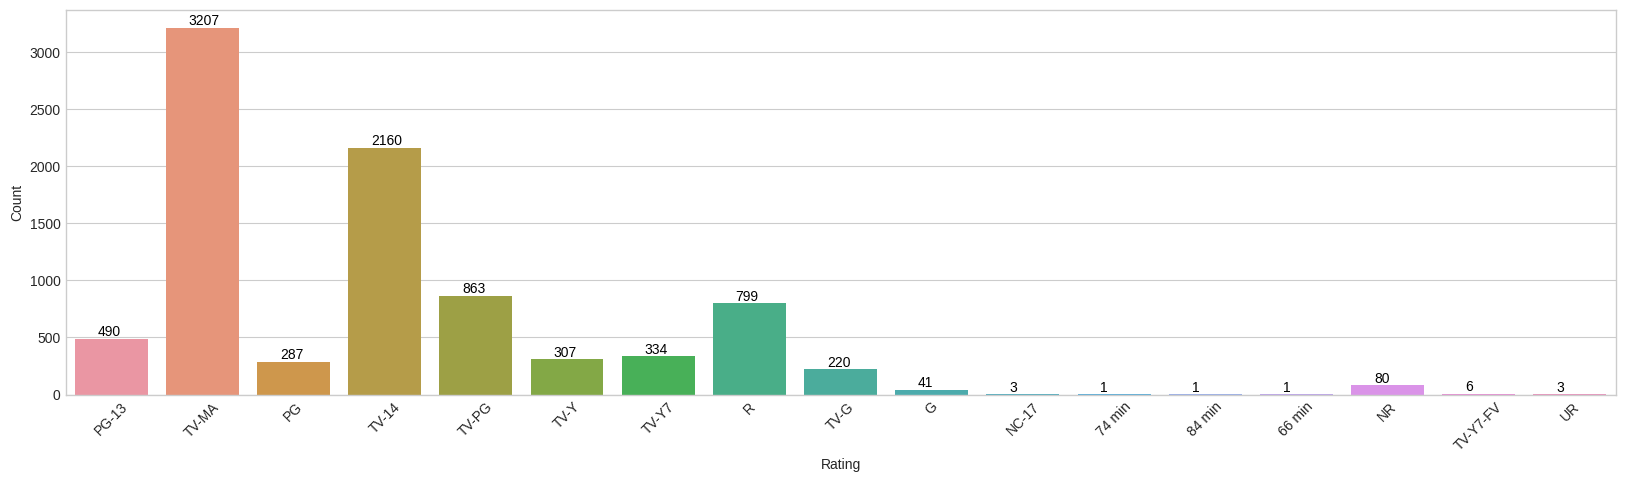

In [128]:
# Checking No. of Ratings in each category for movies and TV shows

plt.figure(figsize = (20, 5))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'rating', data = netflix_df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

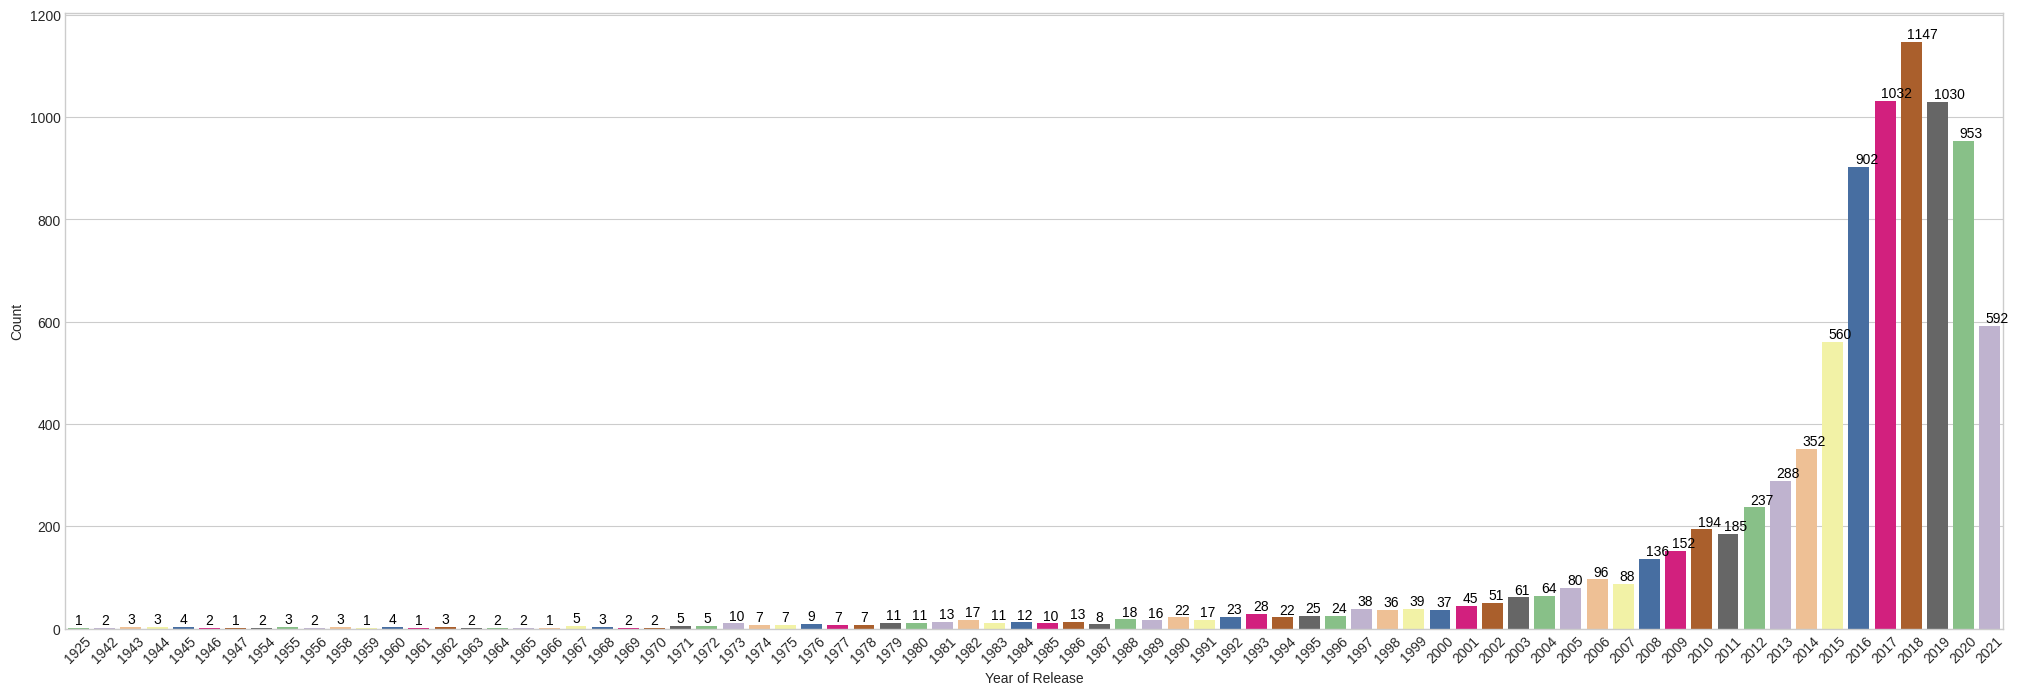

In [129]:
# How many movies or tv shows release each year

plt.figure(figsize = (25, 8))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'release_year', data = netflix_df, palette = "Accent")
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

* <b> Changing "date_added" column type from object to datetime64[ns]

In [130]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [131]:
netflix_df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1481,s1482,Movie,The Rope Curse 2,Liao Shih-han,"Lee Kang-sheng, Wilson Hsu, Vera Chen, Yen Che...",Taiwan,2020-12-30,2020,TV-MA,105 min,"Horror Movies, International Movies","After a purification ritual unravels, a confli..."


<Axes: >

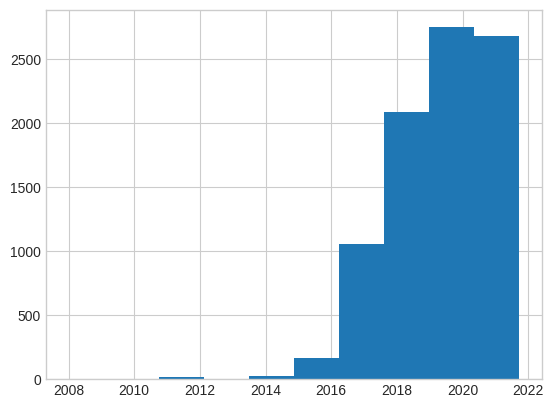

In [132]:
netflix_df["date_added"].hist()

# To check how many TV shows released in the year - 1995

In [133]:
netflix_df[(netflix_df["type"] == "TV Show") & (netflix_df["release_year"] == 1995)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3724,s3725,TV Show,Neon Genesis Evangelion,NaN,"Megumi Ogata, Kotono Mitsuishi, Yuriko Yamaguc...",Japan,2019-06-21,1995,TV-MA,1 Season,"Anime Series, International TV Shows","Fifteen years after the Second Impact, Shinji ..."
8669,s8670,TV Show,V.R. Troopers,NaN,"Michael Sorich, Gardner Baldwin, Mike Reynolds...",United States,2016-01-01,1995,TV-G,2 Seasons,Kids' TV,Three friends who study martial arts find them...


# Plotting histogram of how many movies/TV shows released each year

<Axes: >

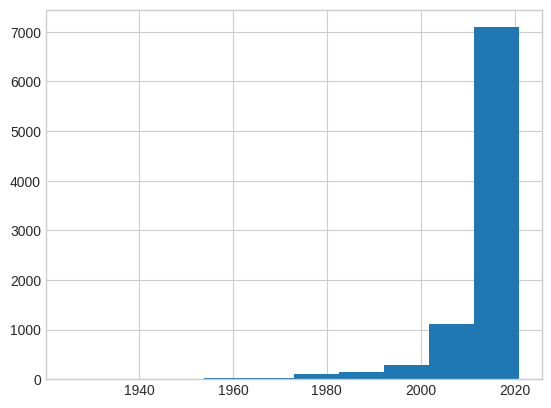

In [134]:
netflix_df["release_year"].hist()

# Checking whether David Attenborough: A Life on Our Planet is present in Netflix ornot?

In [135]:
netflix_df[netflix_df["title"].isin(["David Attenborough: A Life on Our Planet"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1886,s1887,Movie,David Attenborough: A Life on Our Planet,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",David Attenborough,"United States, United Kingdom",2020-10-04,2020,PG,84 min,Documentaries,"A broadcaster recounts his life, and the evolu..."


# Plotting Histogram of how many Movies/Tv shows released each year

In [136]:
px.histogram(netflix_df, x = "release_year", color = "release_year")

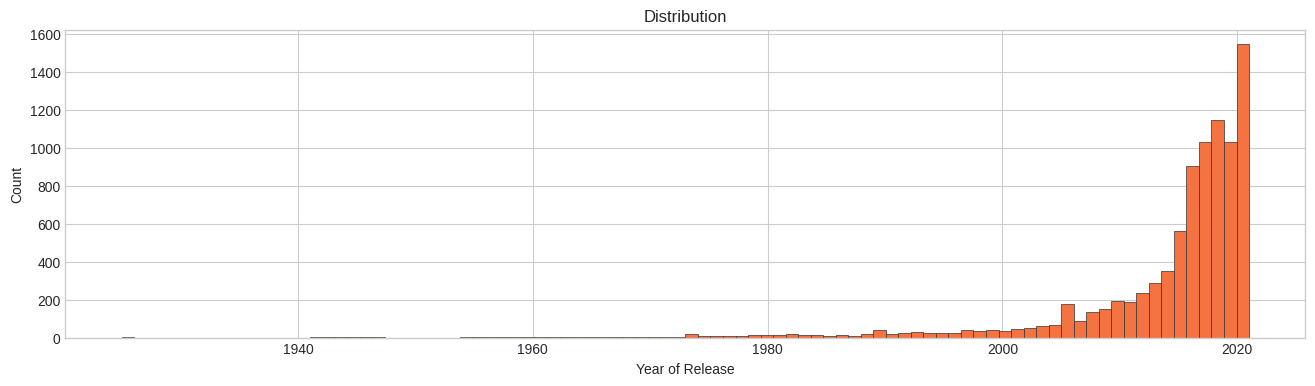

In [137]:
plt.figure(figsize=(16, 4))
plt.style.use('seaborn-whitegrid')
plt.hist(netflix_df["release_year"], bins = 90, facecolor = '#F47340', edgecolor='#323232', linewidth=0.5)
plt.title('Distribution')
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.show()

# The No of Movies made only in Japan

In [138]:
movies_only_in_japan = netflix_df[(netflix_df["type"] == "Movie") & (netflix_df["country"] == "Japan")]["title"]

In [139]:
movies_only_in_japan.count()

76

In [140]:
movies_only_in_japan.unique()

array(['InuYasha the Movie 2: The Castle Beyond the Looking Glass',
       'InuYasha the Movie 3: Swords of an Honorable Ruler',
       'InuYasha the Movie 4: Fire on the Mystic Island',
       'InuYasha the Movie: Affections Touching Across Time',
       'Naruto Shippuden the Movie: Blood Prison',
       'Naruto Shippûden the Movie: Bonds',
       'Naruto Shippûden the Movie: The Will of Fire',
       'Naruto Shippuden: The Movie',
       'Naruto Shippuden: The Movie: The Lost Tower',
       'Naruto the Movie 2: Legend of the Stone of Gelel',
       'Naruto the Movie 3: Guardians of the Crescent Moon Kingdom',
       'Naruto the Movie: Ninja Clash in the Land of Snow', 'HOMUNCULUS',
       'GANTZ:O', 'Ride or Die',
       'Seven Souls in the Skull Castle: Season Flower',
       'Any Crybabies Around?', 'Blue, Painful, Fragile', 'MOTHER',
       'DTC Yukemuri Junjo Hen From High & Low', 'High & Low The Movie',
       'High & Low The Movie 2 / End of Sky',
       'High & Low The Movie 3

### Working with Date

In [141]:
netflix_df["date_added"].dt.month

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
8802    11.0
8803     7.0
8804    11.0
8805     1.0
8806     3.0
Name: date_added, Length: 8807, dtype: float64

In [142]:
netflix_df["date_added_month"] = netflix_df["date_added"].dt.month.fillna(-1)
netflix_df["date_added_month"].unique()

array([ 9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 12., 11., 10., -1.])

In [143]:
netflix_df["date_added_month"] = netflix_df["date_added_month"].astype("Int64")
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  date_added_month  8807 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(10)
memory usage: 903.2+ KB


# The No of Content added Month-wise

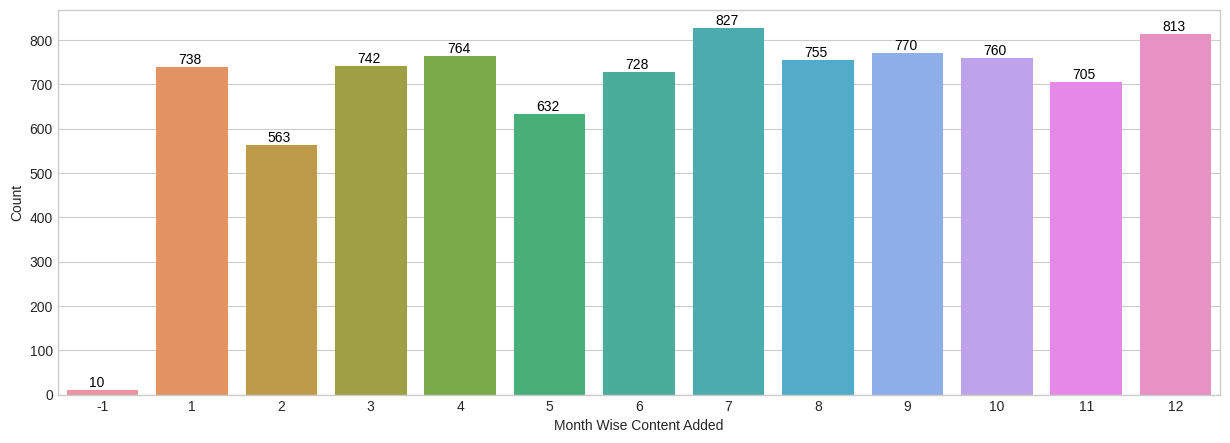

In [144]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(x = 'date_added_month', data = netflix_df)
plt.xlabel('Month Wise Content Added')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [145]:
netflix_df["date_added_day"] = netflix_df["date_added"].dt.day.fillna(-1)
netflix_df["date_added_day"].unique()

array([25., 24., 23., 22., 21., 20., 19., 17., 16., 15., 14., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 31., 29., 28., 27.,
       26., 18., 13., 12., 30., -1.])

In [146]:
netflix_df["date_added_day"] = netflix_df["date_added_day"].astype("Int64")
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  date_added_month  8807 non-null   Int64         
 13  date_added_day    8807 non-null   Int64         
dtypes: Int64(2), datetime64[

# The No of Content added Day-wise

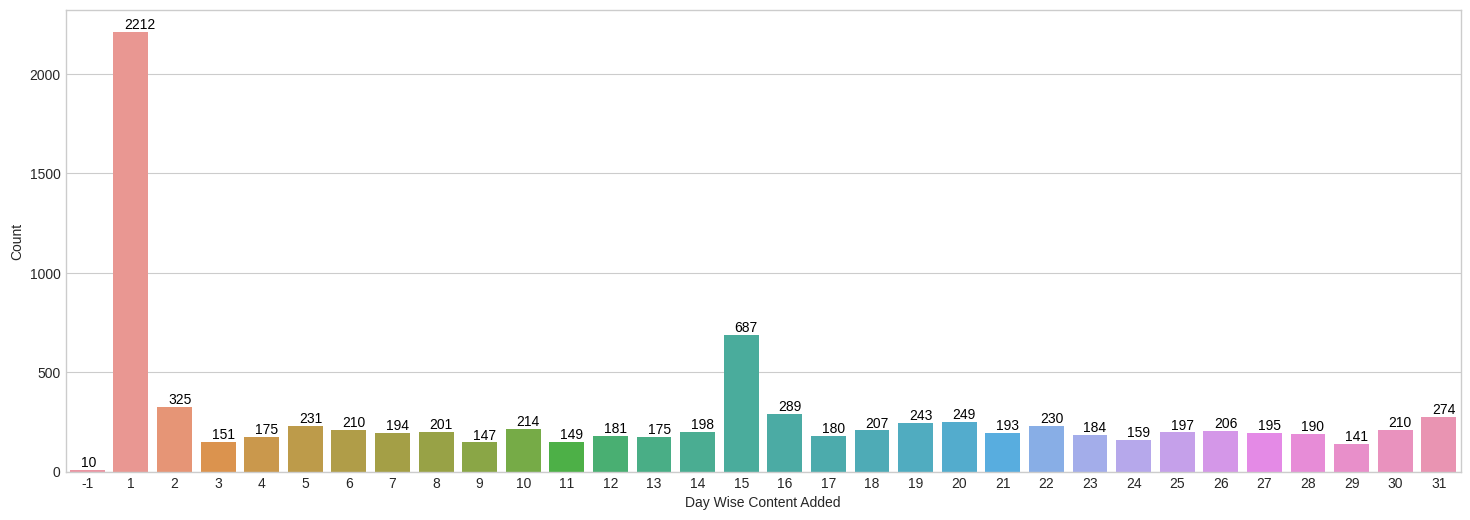

In [147]:
#Checking the Number of content added day wise
plt.figure(figsize = (18, 6))
ax = sns.countplot(x = 'date_added_day', data = netflix_df)
plt.xlabel('Day Wise Content Added')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

# Content released per year vs Month-wise content Added

In [148]:
df = px.data.tips()
fig = px.scatter(netflix_df, x = "release_year", y = "date_added_month", color = "type", color_discrete_sequence = ["orange", "violet"])
fig.show()

In [149]:
netflix_df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day
7666,s7667,TV Show,One Strange Rock,NaN,Will Smith,United States,2019-02-02,2018,TV-PG,1 Season,"Docuseries, Science & Nature TV","Hosted by Will Smith, this series follows eigh...",2,2


### Working with Country

In [150]:
country_count = netflix_df.copy()
country_count = pd.concat([country_count, netflix_df["country"].str.split(",", expand = True)], axis = 1)
country_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,2,3,4,5,6,7,8,9,10,11
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [151]:
country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")
country_count = country_count[country_count["country"].notna()]
country_count

,type,title,variable,country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


In [152]:
country_count["country"].nunique()

197

In [153]:
country_count["country"].value_counts()[:10]

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
 France            181
Name: country, dtype: int64

# Top 30 countries where most of the Movies or TV shows produced

Text(0.5, 0, 'Count')

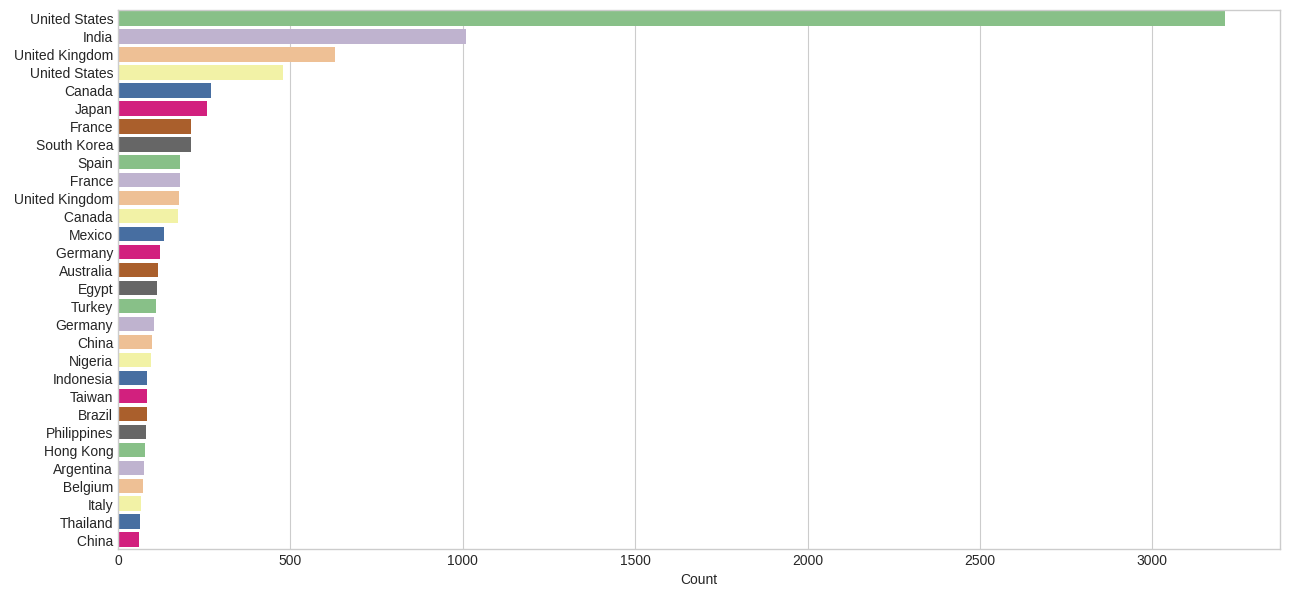

In [154]:
plt.figure(figsize = (15, 7))
country = country_count["country"].value_counts()[:30]
sns.barplot(x = country, y = country.index, palette = "Accent")
plt.xlabel("Count")

### There are 2 different United States entry in the Dataset, so we will Merge the Duplicate value with Original to Make a single entry

In [155]:
country_count["country"] = country_count["country"].str.strip()

In [156]:
country_count["country"].value_counts()[:10]

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

# Top 30 Countries where most of the movies/TV shows are produced - cleaned

<Axes: xlabel='country'>

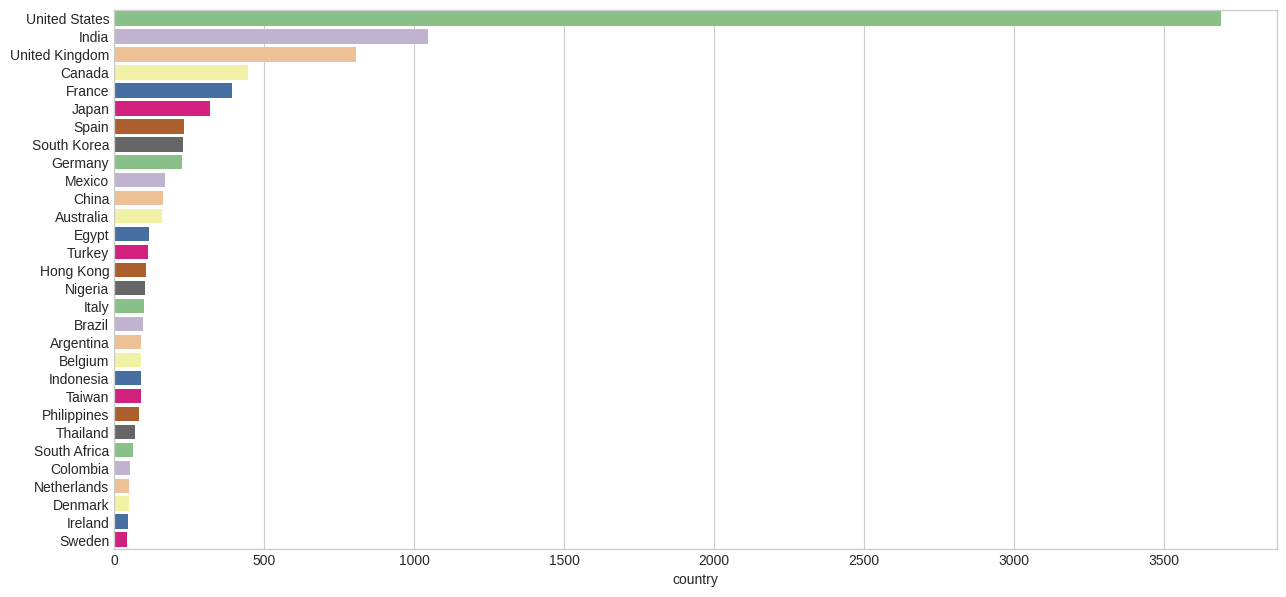

In [157]:
plt.figure(figsize = (15, 7))
country = country_count["country"].value_counts()[:30]
sns.barplot(x = country, y = country.index, palette = "Accent")

In [158]:
px.histogram(country_count, "country", color = "type").update_xaxes(categoryorder = "total descending")

In [159]:
netflix_df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day
6812,s6813,Movie,Frozen Planet: The Epic Journey,NaN,David Attenborough,"United Kingdom, United States, Spain, Germany,...",2016-01-28,2011,TV-PG,52 min,Movies,Collecting highlights from the epic documentar...,1,28


# Heatmap b/w Content Rating vs content type

<Axes: xlabel='type', ylabel='rating'>

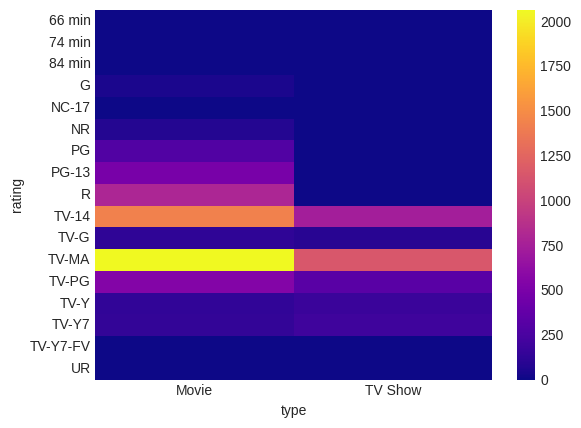

In [160]:
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(netflix_df["rating"], netflix_df["type"]), cmap = colormap)

# Dendrogram b/w content Rating vs content Type

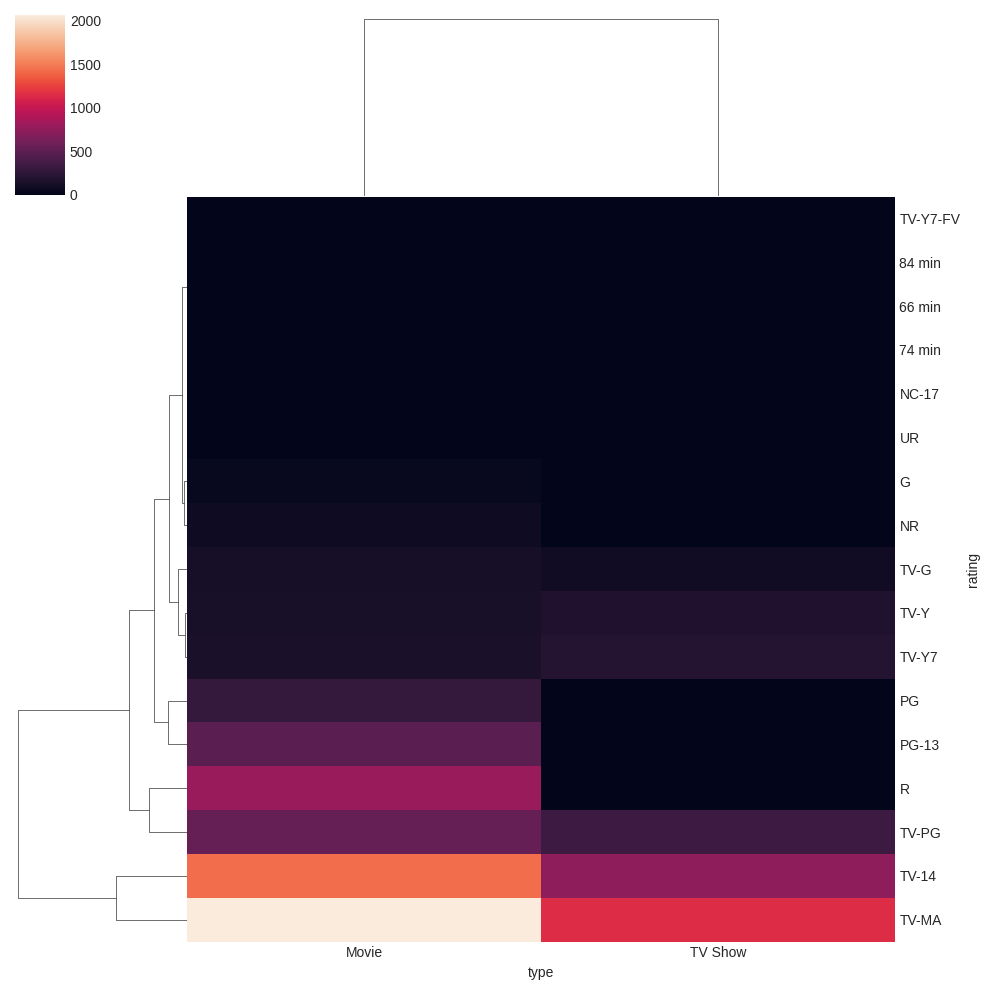

In [161]:
sns.clustermap(pd.crosstab(netflix_df["rating"], netflix_df["type"]))

### Working with Cast

In [162]:
cast_count = netflix_df.copy()
cast_count = pd.concat([cast_count, netflix_df["cast"].str.split(",", expand = True)], axis = 1)
cast_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,40,41,42,43,44,45,46,47,48,49
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [163]:
cast_count = cast_count.melt(id_vars = ["type", "title"], value_vars = range(50), value_name = "cast")
cast_count = cast_count[cast_count["cast"].notna()]
cast_count

,type,title,variable,cast
1,TV Show,Blood & Water,0,Ama Qamata
2,TV Show,Ganglands,0,Sami Bouajila
4,TV Show,Kota Factory,0,Mayur More
5,TV Show,Midnight Mass,0,Kate Siegel
6,Movie,My Little Pony: A New Generation,0,Vanessa Hudgens
...,...,...,...,...
417703,TV Show,Black Mirror,47,Jon Hamm
424590,TV Show,Social Distance,48,Ayize Ma'at
426510,TV Show,Black Mirror,48,Oona Chaplin
433397,TV Show,Social Distance,49,Lovie Simone


In [164]:
cast_count["cast"].nunique()

39296

# Top 20 Actors who are part of the most no of Movies/tv shows

<Axes: xlabel='cast'>

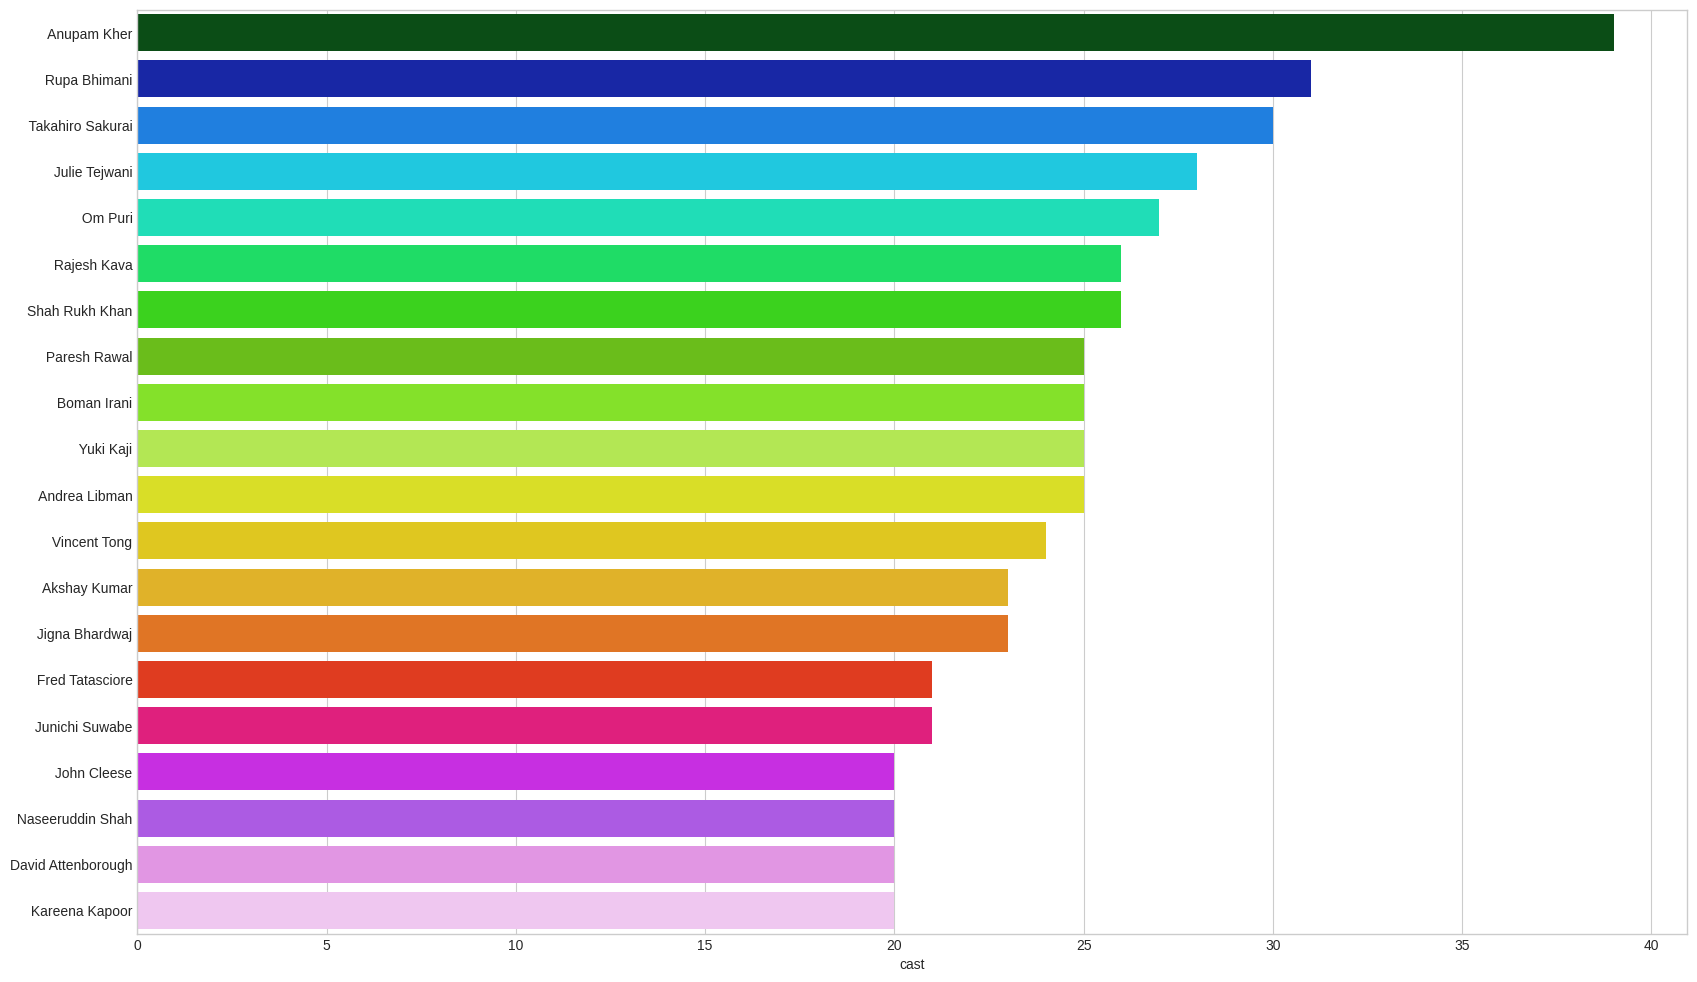

In [165]:
plt.figure(figsize = (20, 12))
cast = cast_count["cast"].value_counts()[:20]
sns.barplot(x = cast, y = cast.index, palette = "gist_ncar")

# Movies on Netflix where Bill Murray Acted

In [166]:
updated_df = netflix_df.dropna()

In [167]:
updated_df[updated_df["cast"].str.contains("Bill Murray")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day
494,s495,Movie,Rock the Kasbah,Barry Levinson,"Bill Murray, Kate Hudson, Zooey Deschanel, Dan...",United States,2021-07-08,2015,R,106 min,"Comedies, Music & Musicals",When a has-been music producer gets stuck in A...,7,8
566,s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany",2021-07-01,2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...,7,1
5881,s5882,Movie,A Very Murray Christmas,Sofia Coppola,"Bill Murray, Miley Cyrus, George Clooney, Chri...",United States,2015-12-04,2015,TV-14,57 min,"Comedies, Music & Musicals",Bill Murray rounds up an all-star cast for an ...,12,4
6036,s6037,Movie,A Glimpse Inside the Mind of Charles Swan III,Roman Coppola,"Charlie Sheen, Jason Schwartzman, Bill Murray,...",United States,2018-07-15,2012,R,86 min,"Comedies, Independent Movies",When his girlfriend walks out and leaves him a...,7,15
6842,s6843,Movie,Get Smart,Peter Segal,"Steve Carell, Anne Hathaway, Dwayne Johnson, A...",United States,2019-04-01,2008,PG-13,110 min,"Action & Adventure, Comedies",When the identities of secret agents are compr...,4,1
7210,s7211,Movie,Kingpin,"Peter Farrelly, Bobby Farrelly","Woody Harrelson, Randy Quaid, Vanessa Angel, B...",United States,2020-01-01,1996,PG-13,114 min,"Comedies, Cult Movies, Sports Movies","After a bowler loses his hand, his career take...",1,1
8105,s8106,Movie,Stripes,Ivan Reitman,"Bill Murray, Harold Ramis, Warren Oates, P.J. ...",United States,2019-09-01,1981,R,106 min,"Classic Movies, Comedies, Cult Movies","After losing everything, an indolent sad sack ...",9,1
8210,s8211,Movie,The Bill Murray Stories: Life Lessons Learned ...,Tommy Avallone,"Tommy Avallone, Bill Murray, Joel Murray, Pete...",United States,2018-12-31,2018,TV-MA,72 min,Documentaries,This documentary highlights spontaneous encoun...,12,31
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,1


### Working with Listed in

In [168]:
listed_in_count = netflix_df.copy()
listed_in_count = pd.concat([listed_in_count, netflix_df["listed_in"].str.split(",", expand = True)], axis = 1)
listed_in_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,0,1,2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,25,Documentaries,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,24,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,24,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,24,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,24,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,20,Cult Movies,Dramas,Thrillers
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,1,Kids' TV,Korean TV Shows,TV Comedies
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,1,Comedies,Horror Movies,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,11,Children & Family Movies,Comedies,None


In [169]:
listed_in_count = listed_in_count.melt(id_vars = ["type", "title"], value_vars = range(3), value_name = "listed_in")
listed_in_count = listed_in_count[listed_in_count["listed_in"].notna()]
listed_in_count

,type,title,variable,listed_in
0,Movie,Dick Johnson Is Dead,0,Documentaries
1,TV Show,Blood & Water,0,International TV Shows
2,TV Show,Ganglands,0,Crime TV Shows
3,TV Show,Jailbirds New Orleans,0,Docuseries
4,TV Show,Kota Factory,0,International TV Shows
...,...,...,...,...
26414,TV Show,Zindagi Gulzar Hai,2,TV Dramas
26415,Movie,Zinzana,2,Thrillers
26416,Movie,Zodiac,2,Thrillers
26417,TV Show,Zombie Dumb,2,TV Comedies


In [170]:
listed_in_count["listed_in"].unique()

array(['Documentaries', 'International TV Shows', 'Crime TV Shows',
       'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas',
       'British TV Shows', 'Comedies', 'TV Comedies', 'Thrillers',
       'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV',
       'Anime Series', 'International Movies', 'Sci-Fi & Fantasy',
       'Classic Movies', 'TV Shows', 'Stand-Up Comedy',
       'TV Action & Adventure', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV', 'Anime Features', 'Romantic TV Shows',
       'Cult Movies', 'Independent Movies', 'TV Horror',
       'Spanish-Language TV Shows', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Sports Movies',
       ' TV Dramas', ' International TV Shows', ' Reality TV',
       ' Romantic TV Shows', ' TV Horror', ' Independent Movies',
       ' Dramas', ' Docuseries', ' International Movies', ' Comedies',
       ' Crime TV Shows', ' Spanish-Language TV Shows',
      

In [171]:
netflix_df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

# Top 20 Genre for the Movies/TV Shows

<Axes: xlabel='listed_in'>

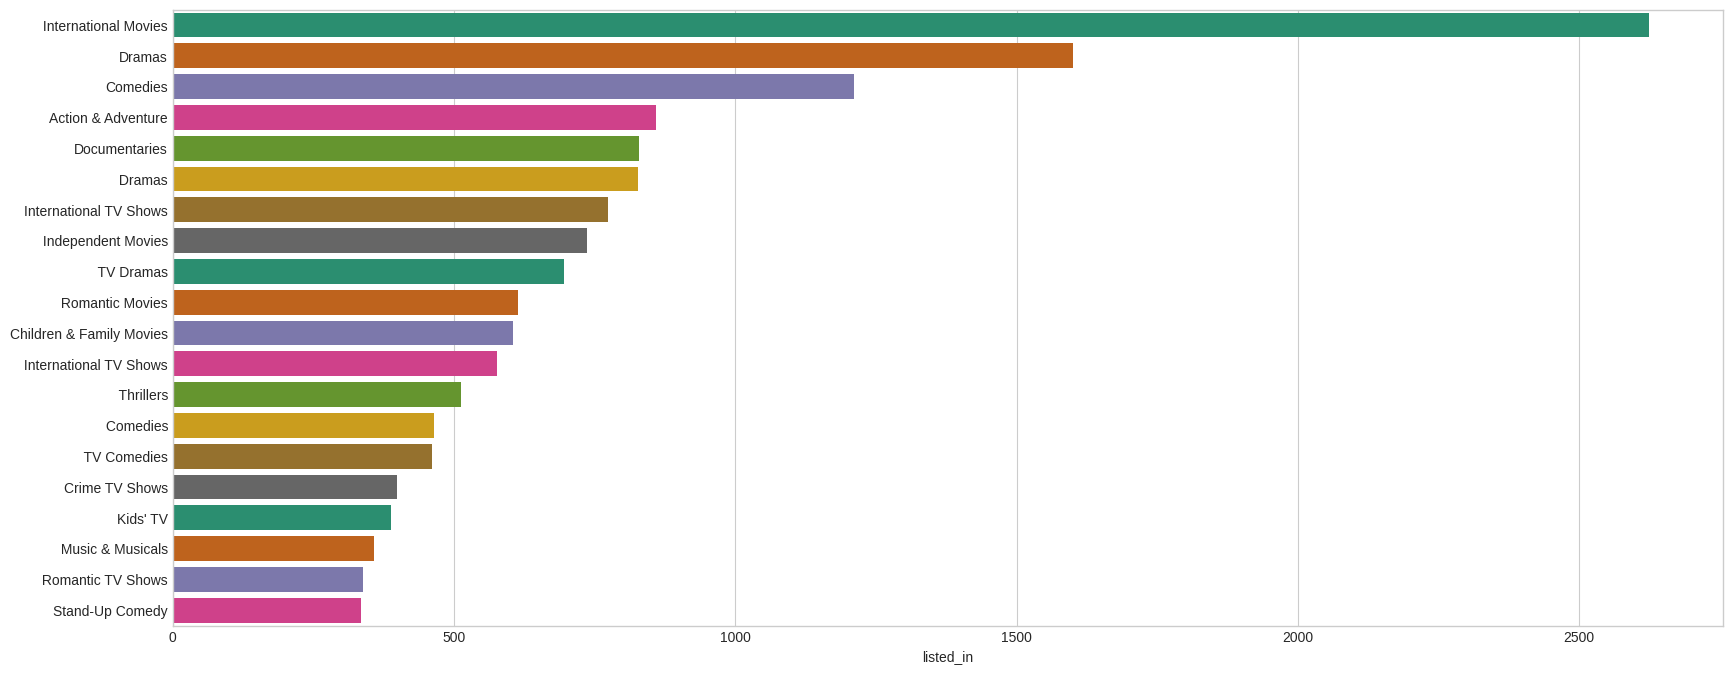

In [172]:
plt.figure(figsize = (20, 8))
listed_in = listed_in_count["listed_in"].value_counts()[:20]
sns.barplot(x = listed_in, y = listed_in.index, palette = "Dark2")

In [173]:
netflix_df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day
7655,s7656,Movie,Once In A Lifetime Sessions with Nile Rodgers,Charlie Lightening,Nile Rodgers,United States,2018-08-01,2018,TV-PG,70 min,"Documentaries, Music & Musicals",The career of rhythm guitarist and Chic founde...,8,1


In [174]:
print(netflix_df["description"])

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object


# Word cloud on summary of the Movies/TV shows

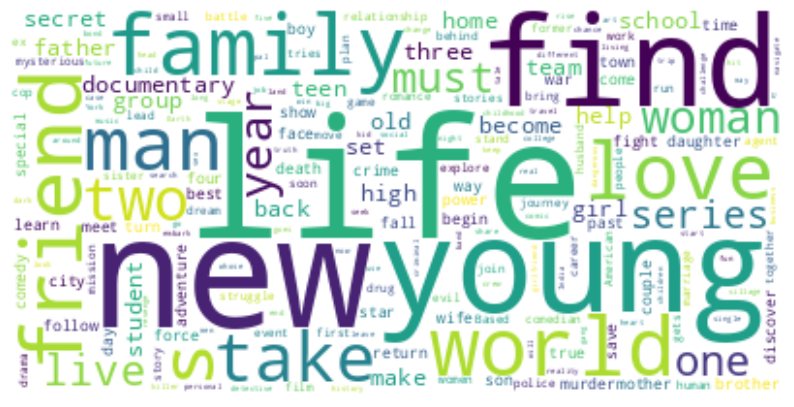

In [175]:
text = " ".join(description for description in netflix_df.description)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (10, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

### Working with Director

In [176]:
director_count = netflix_df.copy()
director_count = pd.concat([director_count, netflix_df["director"].str.split(",", expand = True)], axis = 1)
director_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,3,4,5,6,7,8,9,10,11,12
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [177]:
director_count = director_count.melt(id_vars = ["type", "title"], value_vars = range(13), value_name = "director")
director_count = director_count[director_count["director"].notna()]
director_count

,type,title,variable,director
0,Movie,Dick Johnson Is Dead,0,Kirsten Johnson
2,TV Show,Ganglands,0,Julien Leclercq
5,TV Show,Midnight Mass,0,Mike Flanagan
6,Movie,My Little Pony: A New Generation,0,Robert Cullen
7,Movie,Sankofa,0,Haile Gerima
...,...,...,...,...
95585,Movie,Movie 43,10,Rusty Cundieff
102764,Movie,Walt Disney Animation Studios Short Films Coll...,11,Mike Gabriel
103787,Movie,HALO Legends,11,Hiroshi Yamazaki
104392,Movie,Movie 43,11,James Gunn


In [178]:
director_count["director"].nunique()

5120

In [179]:
director_count["director"].value_counts()

Rajiv Chilaka         22
 Jan Suter            18
Raúl Campos           18
Suhas Kadav           16
Marcus Raboy          16
                      ..
Peter Howitt           1
Chiwetel Ejiofor       1
Rodrigo Salomón        1
Miguel Ángel Vivas     1
 Mark Henn             1
Name: director, Length: 5120, dtype: int64

# Top 20 directors

<Axes: xlabel='director'>

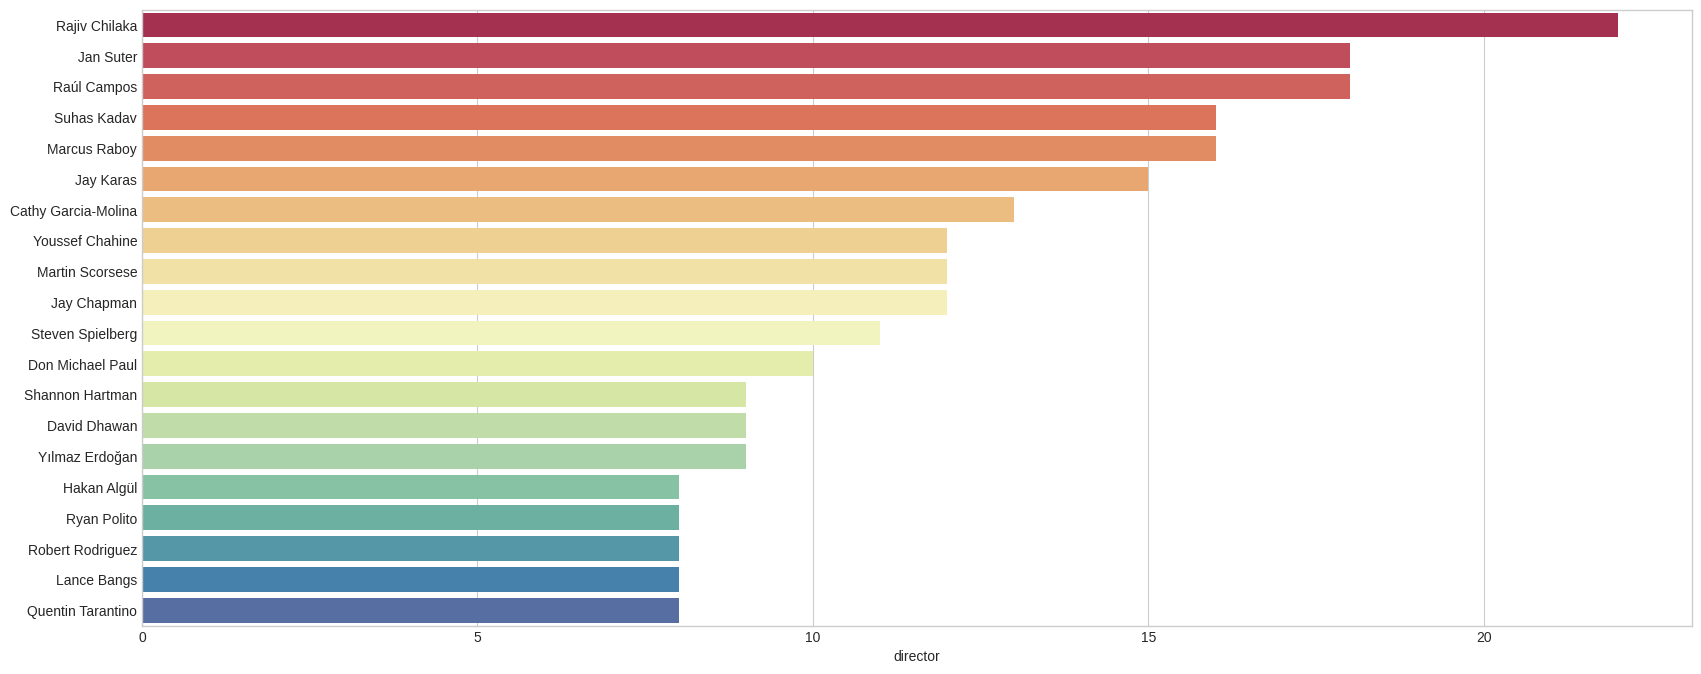

In [180]:
plt.figure(figsize = (20, 8))
director_count = director_count["director"].value_counts()[:20]
sns.barplot(x = director_count, y = director_count.index, palette = "Spectral")

# Word cloud on Title of the Movies/TV shows

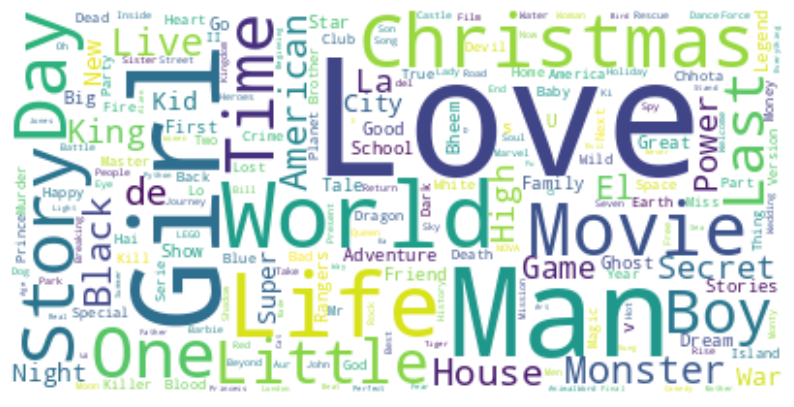

In [181]:
text = " ".join(title for title in netflix_df.title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (10, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()